### Regressão Linear - Parte 1

In [ ]:
import numpy as np

# Exemplo de dados - X é a altura e Y o peso de cada pessoa
X = np.array([1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70,
1.73, 1.75, 1.78, 1.80, 1.83])

y = np.array([52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29,
63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46])

A equação da Regressão Linear é da forma:

\begin{align}
      y = B_0 + B_1  x
    \end{align}

Sendo que os coeficientes ${B_0}$ (intercepto) e ${B_1}$ (inclinação) podem ser calculados pelas fórmulas:

\begin{align}
      B_0 = \frac{\sum{y} - B_1\sum{x}}{n}
    \end{align}

e ${B_1}$ é dado por:

\begin{align}
      B_1 = \frac{n\sum xy - \sum x \sum y} {n \sum x^2 - (\sum x)^2}
    \end{align}

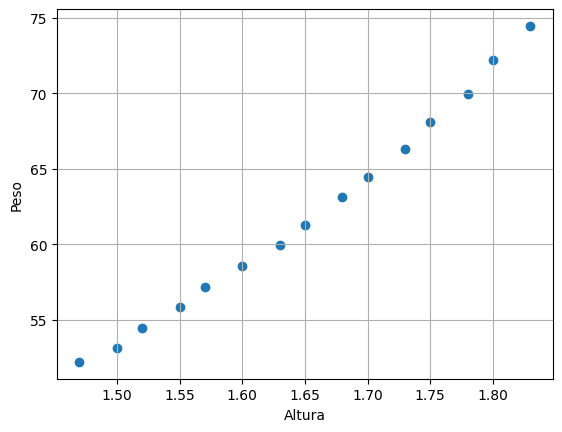

In [ ]:
import matplotlib.pyplot as plt

# Plotar X e Y
plt.scatter(X, y)
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.grid()
plt.show()

In [ ]:
# Crie uma função para prever os valores utilizando os coeficientes e trace a
# reta de regressão

class LinearRegression:
    def __init__(self):
        self.b0 = 0 # Intercepto
        self.b1 = 0 # Coeficiente de inclinação

    def fit(self, X, y):
        n = len(X)

        # Cálculo do coeficiente de inclinação
        self.b1 = (n * np.sum(X * y) - np.sum(X) * np.sum(y)) / ((n * np.sum(X * X)) - np.sum(X) * np.sum(X))

        # Cálculo do intercepto
        self.b0 = (np.sum(y) - self.b1 * np.sum(X)) / n

    def predict(self, X):
      return self.b0 + self.b1 * X

n = len(X)
b1 = (n * np.sum(X * y) - np.sum(X) * np.sum(y)) / ((n * np.sum(X * X)) - np.sum(X) * np.sum(X))
b0 = (np.sum(y) - b1 * np.sum(X)) / n

print("Coeficiente de inclinação (b1):", b1)
print("Intercepto (b0):", b0)


Coeficiente de inclinação (b1): 61.272186542107434
Intercepto (b0): -39.061955918838656


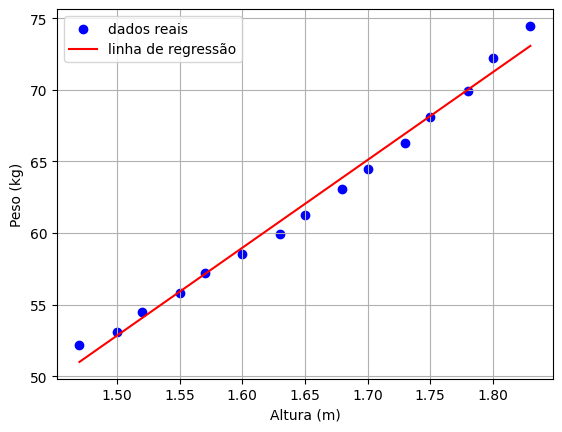

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color = 'blue', label = 'dados reais')
plt.xlabel("Altura (m)")
plt.ylabel("Peso (kg)")
plt.plot(X, y_pred, color = 'red', label = 'linha de regressão')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Previsão do peso para o prédio mais alto do mundo (Burj Khalifa)
height_burj_khalifa = 828
weight_burj_khalifa = model.predict(height_burj_khalifa)
print("Peso previsto para o prédio Burj Khalifa (kg): ", weight_burj_khalifa)
print("Peso real do Burj Khalifa (ton): 500 000 000 kg")


Peso previsto para o prédio Burj Khalifa (kg):  50694.308500946114
Peso real do Burj Khalifa (ton): 500 000 000 kg


RSE (Erro Padrão Residual)

Representa o desvio padrão dos resíduos (diferença entre os valores reais e os valores peditos).

Sua fórmula é:
\begin{align}
      RSE = \sqrt{ \frac {1}{n - 2}
      \sum_{i = 1}^n (y_i - \hat{y_i})² }
    \end{align}

In [ ]:
y_pred

array([51.0081583 , 52.84632389, 54.07176763, 55.90993322, 57.13537695,
       58.97354255, 60.81170814, 62.03715188, 63.87531747, 65.1007612 ,
       66.9389268 , 68.16437053, 70.00253613, 71.22797986, 73.06614545])

In [ ]:
class Residuals:
    def __init__(self):
      self.RSE = 0
      self.R2 = 0

    def rse(self, y, y_pred):
      n = len(y)
      self.RSE = np.sqrt((1 / (n - 2)) * np.sum((y - y_pred) ** 2))
      return self.RSE

    def r2(self, y, y_pred):
      n = len(y)
      self.R2 = 1 - (np.sum((y - y_pred) ** 2)) / (np.sum((y - np.mean(y)) ** 2))
      return self.R2



In [ ]:
model_residuals = Residuals()
model_rse = model_residuals.rse(y, y_pred)
print("Erro Padrão Residual (RSE) do modelo: ", model_rse)
model_r2 = model_residuals.r2(y, y_pred)
print("Coeficiente de Determinação (R²) do modelo: ", model_r2)

Erro Padrão Residual (RSE) do modelo:  0.7590762809485331
Coeficiente de Determinação (R²) do modelo:  0.9891969224457969


Ou seja, isso significa que 98% da variável dependende (o peso) é explicada pela altura

### Regressão Linear - Parte 2

Vamos utilizar o dataset tips, que
contém dados sobre gorjetas e pode ser usado para prever o valor da gorjeta com base em variáveis
como total da conta.

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split

# Carregar dataset
df_tips = sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
X = df_tips['total_bill']
y = df_tips['tip']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print("Tamanho do dataset de treino: ", len(X_train))
print("Tamanho do dataset de teste: ", len(X_test))

Tamanho do dataset de treino:  195
Tamanho do dataset de teste:  49


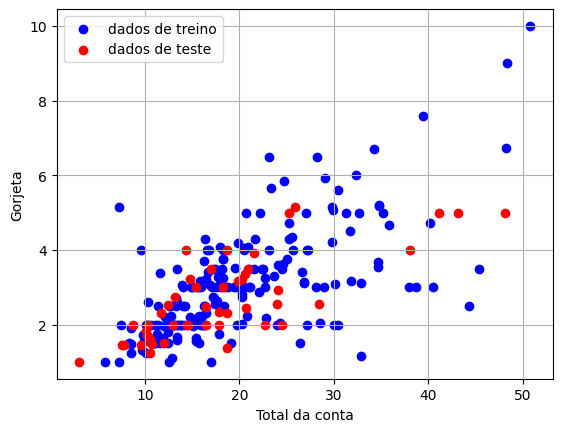

In [ ]:
plt.scatter(X_train, y_train, color = 'blue', label = 'dados de treino')
plt.scatter(X_test, y_test, color = 'red', label = 'dados de teste')
plt.xlabel("Total da conta")
plt.ylabel("Gorjeta")
plt.grid()
plt.legend()
plt.show()

Coeficiente de inclinação (b1): 0.107
Coeficiente de intercepto (b0):0.925


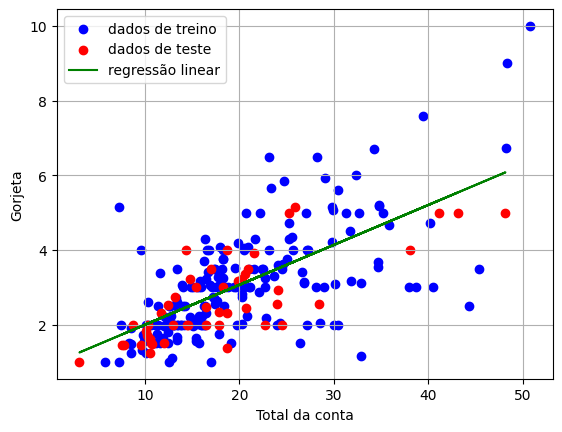

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Coeficiente de inclinação (b1): {model.b1:.3f}")
print(f"Coeficiente de intercepto (b0): {model.b0:.3f}")

plt.scatter(X_train, y_train, color = 'blue', label = 'dados de treino')
plt.scatter(X_test, y_test, color = 'red', label = 'dados de teste')
plt.plot(X_test, y_pred, color = 'green', label = 'regressão linear')
plt.xlabel("Total da conta")
plt.ylabel("Gorjeta")
plt.grid()
plt.legend()
plt.show()

In [ ]:
rse = model_residuals.rse(y_test, y_pred)
print(f"Erro Padrão Residual (RSE) do modelo: {rse:.3f}")

r2 = model_residuals.r2(y_test, y_pred)
print(f"Coeficiente de Determinação (R²) do modelo: {r2:.3f}")

Erro Padrão Residual (RSE) do modelo: 0.770
Coeficiente de Determinação (R²) do modelo: 0.545


Nosso coeficiente de determinação não foi tão alta assim igual o primeiro caso. Ou seja, a variável que estamos tentando prever (valor da gorjeta) não é tão bem explicada (54%) pelo total da conta da pessoa

In [ ]:
# Previsão da gorjeta para uma conta de 80 dolares
total_bill = 80
tip_predicted = model.predict(total_bill)
print(f"Previsão de gorjeta para uma conta de {total_bill} dolares: U${tip_predicted:.3f}")

Previsão de gorjeta para uma conta de 80 dolares: U$9.482
